## ДЗ 6
## Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from hmmlearn.hmm import GaussianHMM


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### Возьмем ряд по месячным продажам машин в Квебеке

In [7]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']

# Дифференцируем, чтобы убрать тренд
series_diff = np.diff(series, 1)

In [8]:
# Разделим на train test для проверки качества модели
d_point = 90
train_values = series_diff[:d_point].reshape(-1, 1)
test_values = series_diff[d_point:].reshape(-1, 1)

In [22]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(train_values)
    print (n, model.score(train_values))

1 -856.9392770403864
2 -854.1947484314891
3 -847.134649391654
4 -836.153994265292
5 -827.3145565831253
6 -821.033925136956
7 -815.8347989213764


Fitting a model with 98 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.


8 -805.6191557186229
9 -794.0698347706251


Fitting a model with 142 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 90 data points will result in a degenerate solution.


10 -791.1582278942145
11 -782.880191930318


Fitting a model with 194 free scalar parameters with only 90 data points will result in a degenerate solution.


12 -780.3041202784538
13 -769.2628590402355


после 7 компонент качество модели ухудшается. поэтому возьмем 7

In [24]:
# обучим модель
model = GaussianHMM(n_components=7,
                        covariance_type="full",
                        n_iter=2000)
model.fit(train_values)
labels = model.predict(train_values)
means = np.zeros_like(train_values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]


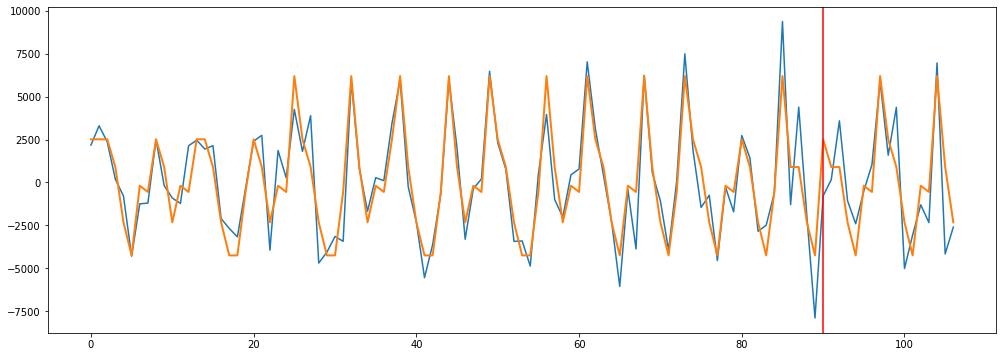

In [25]:
# Построим предсказание
predicted_labels = model.predict(test_values)
predicted_means = np.zeros_like(test_values)

for i in range(model.n_components):
    predicted_means[predicted_labels == i] = model.means_[i]
    
means_concatenated = np.concatenate([means, predicted_means])
plt.figure(figsize=(17, 6))
plt.plot(series_diff)
plt.plot(means_concatenated, linewidth=2)
plt.axvline(x=d_point, color='red')
plt.show()

### Посмотрим качество модели

In [26]:
print(r2_score(train_values, means))
print(r2_score(test_values, predicted_means))

0.8393207188838471
0.5909312743891505


Качество модели на тесте хорошее